In [1]:
#numpy for csv io, pandas for dataframe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#read in file
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
#Change heart disease from 'presence'/'absence' to 1/0
df[['Heart Disease']] = df[['Heart Disease']].replace(['Presence','Absence'],[1,0])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [4]:
#Check for -9: missing values in this data set (none present)
df.eq(-9.0).sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
#Check for null values (none present)
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Text(0.5, 1.0, 'Heart Disease')

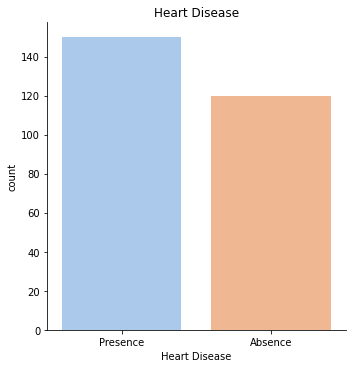

In [6]:
sns.catplot(x= "Heart Disease", kind= "count", data=df, palette= "pastel").set_xticklabels(["Presence", "Absence" ])
plt.title("Heart Disease")

In [7]:
#Show correlation of pairs of attributes
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<AxesSubplot:>

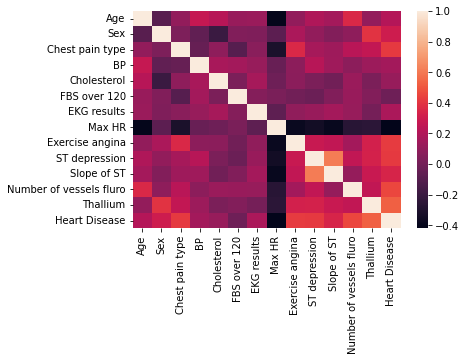

In [8]:
sns.heatmap(df.corr())

In [9]:
#Pick only the 4 with most correlation, including class itself
num_attributes = 6
full_feature_names = df.corr().nlargest(num_attributes,'Heart Disease').index
hd_feature_names = df.corr().nlargest(num_attributes,'Heart Disease').index.drop('Heart Disease')
df.corr().nlargest(num_attributes,'Heart Disease').index.tolist()

['Heart Disease',
 'Thallium',
 'Number of vessels fluro',
 'Exercise angina',
 'ST depression',
 'Chest pain type']

In [10]:
hd_feature_names

Index(['Thallium', 'Number of vessels fluro', 'Exercise angina',
       'ST depression', 'Chest pain type'],
      dtype='object')

Text(0.5, 1.0, 'Thallium of Heart Diseased Patients')

<Figure size 3600x3600 with 0 Axes>

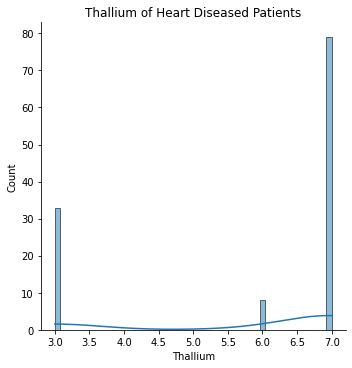

In [11]:
plt.figure(figsize=(50,50))
sns.displot(df[df['Heart Disease']==1]['Thallium'],kde=True,bins=50)
plt.title("Thallium of Heart Diseased Patients")

Text(0.5, 1.0, 'ST depression of Heart Diseased Patients')

<Figure size 3600x3600 with 0 Axes>

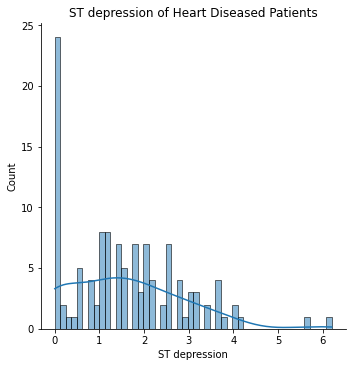

In [12]:
plt.figure(figsize=(50,50))
sns.displot(df[df['Heart Disease']==1]['ST depression'],kde=True,bins=50)
plt.title("ST depression of Heart Diseased Patients")

Text(0.5, 1.0, 'Number of vessels fluro of Heart Diseased Patients')

<Figure size 3600x3600 with 0 Axes>

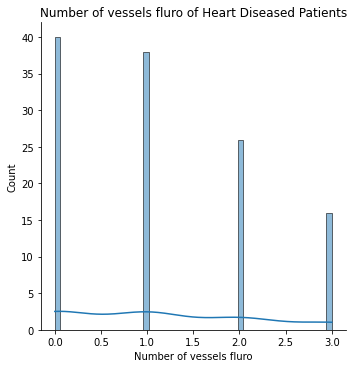

In [13]:
plt.figure(figsize=(50,50))
sns.displot(df[df['Heart Disease']==1]['Number of vessels fluro'],kde=True,bins=50)
plt.title("Number of vessels fluro of Heart Diseased Patients")

Text(0.5, 1.0, ' Exercise angina of Heart Diseased Patients')

<Figure size 3600x3600 with 0 Axes>

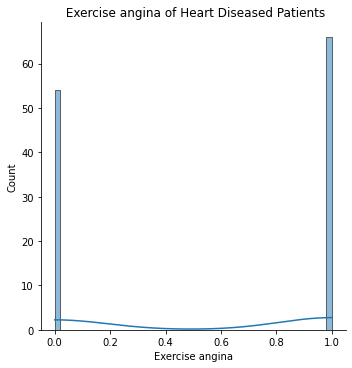

In [14]:
plt.figure(figsize=(50,50))
sns.displot(df[df['Heart Disease']==1]['Exercise angina'],kde=True,bins=50)
plt.title(" Exercise angina of Heart Diseased Patients")

Text(0.5, 1.0, 'chest pain type of Heart Diseased Patients')

<Figure size 3600x3600 with 0 Axes>

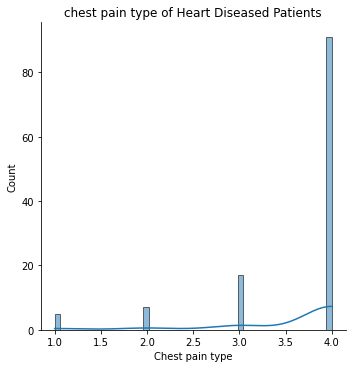

In [15]:
plt.figure(figsize=(50,50))
sns.displot(df[df['Heart Disease']==1]['Chest pain type'],kde=True,bins=50)
plt.title("chest pain type of Heart Diseased Patients")


In [16]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

#X = input attributes, y = class label
X = df[hd_feature_names]
y=df.iloc[:,13]

In [17]:
X

,Thallium,Number of vessels fluro,Exercise angina,ST depression,Chest pain type
0,3,3,0,2.4,4
1,7,0,0,1.6,3
2,7,0,0,0.3,2
3,7,1,1,0.2,4
4,3,1,1,0.2,2
...,...,...,...,...,...
265,7,0,0,0.5,3
266,7,0,0,0.0,2
267,3,0,0,1.3,2
268,6,0,0,0.4,4


In [18]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [19]:
#Use logistic regression with 10-fold cross validation
log_reg=linear_model.LogisticRegression()

log_reg_score=cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

results=[]
results.append(['Logistic:',log_reg_score])
print(results)

[['Logistic:', 0.8296296296296296]]


In [20]:
from sklearn import svm
#Use linear regression with 10-fold cross validation
linear_svm=svm.SVC(kernel='linear')
linear_svm_score=cross_val_score(linear_svm,X,y,cv=10,scoring='accuracy').mean()
results.append(['Linear:',linear_svm_score])
print(results)

[['Logistic:', 0.8296296296296296], ['Linear:', 0.8333333333333333]]


In [21]:
#Decision tree classifier, maximum 5 nodes deep
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf_score = cross_val_score(clf,X,y,cv=10,scoring='accuracy').mean()

results.append(['Tree:',clf_score])
print(results)

[['Logistic:', 0.8296296296296296], ['Linear:', 0.8333333333333333], ['Tree:', 0.7925925925925925]]


Text(0.5, 1.0, 'Decision tree score based on max depth allowed in tree')

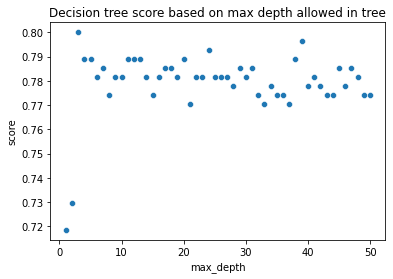

In [22]:
#Check decision tree max depth effect on score
scores = []
for i in range(1,51):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf_score = cross_val_score(clf,X,y,cv=10,scoring='accuracy').mean()
    scores.append([i,clf_score])

dt = pd.DataFrame(scores,columns=['max_depth','score'])
sns.scatterplot(data = dt,x='max_depth',y='score')
plt.title("Decision tree score based on max depth allowed in tree")

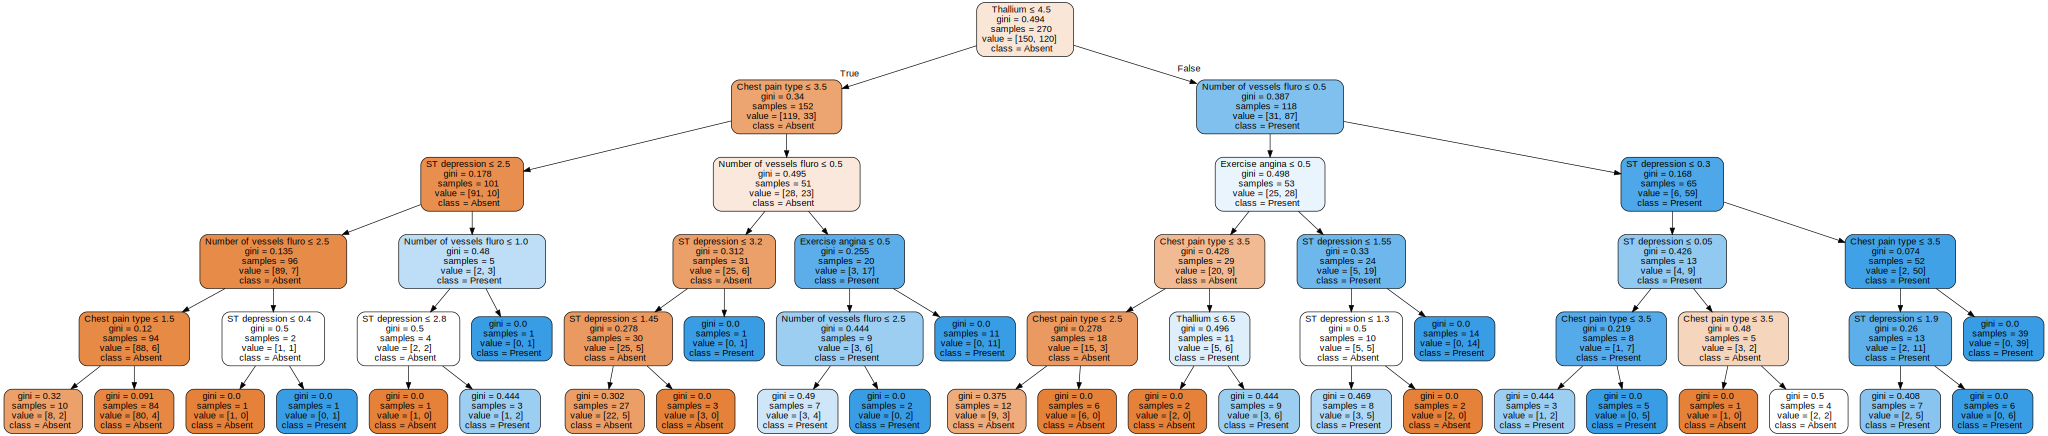

In [24]:
#Visualize the created decision tree with colors
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=5).fit(X,y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=hd_feature_names.to_list(),  
                                class_names=['Absent','Present'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("heartds")
graph

In [25]:
import pickle
filename='heartds.sav'
#Fit the found model to file for prediction
linear_svm.fit(X,y)
pickle.dump(linear_svm,open(filename,'wb'))

#load logistic model made from training data
loaded_model=pickle.load(open(filename,'rb'))

In [26]:
loaded_model

SVC(kernel='linear')

In [28]:
Thallium = 3		#(3,6,7)
Number_of_vessels_fluro = 1 #(0,1,2,3)	
Exercise_angina = 0 	#(0,1)
ST_depression =0 	 #(0,1,2,3)
Chest_pain_type = 1 #(1,2,3,4)
prediction = loaded_model.predict([[Thallium, Number_of_vessels_fluro, Exercise_angina, ST_depression,Chest_pain_type]])
print('Heart disease present' if prediction else 'Heart disease absent')

Heart disease absent


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [29]:
Thallium = 7		
Number_of_vessels_fluro = 3 	
Exercise_angina = 1 	
ST_depression =2 	
Chest_pain_type= 3
prediction = loaded_model.predict([[Thallium, Number_of_vessels_fluro, Exercise_angina, ST_depression,Chest_pain_type]])
print('Heart disease present' if prediction else 'Heart disease absent')

Heart disease present


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
